This code is to be used on the original FrontiersIn dataset. The folders in the "data" folder of this repository are the reuslts of data processing on the original dataset.

In [6]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
import os
import shutil
import math
from PIL import Image

### Data Viewing

Image width:  2642
Image height: 2444


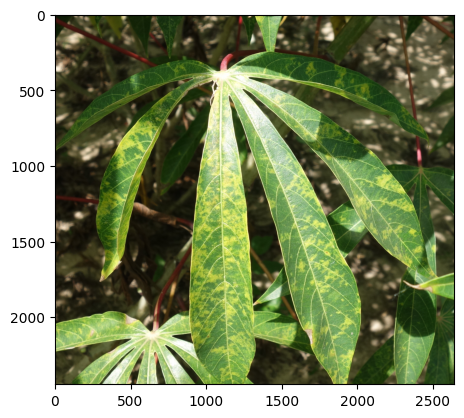

In [2]:
# View first image in the dataset
image = Image.open('Cassava_paper_dataset/CassavaBSD/CassavaBSD_100.jpg').convert("RGB")

# Display image with matplotlib
plt.imshow(image)

# Print image dimensions
print('Image width: ', image.width)
print('Image height:', image.height)

### Data Processing
1. Create folders for the new category: 'Other'
2. Combine the content of the 'Cassava Brown Leaf Spot' + 'Cassava Green Mite' + 'Cassava Red Mite' folders into the Other folder

In [5]:
# Create output folder
root_dir = "./"
parent_dir = "Cassava_paper_dataset/CassavaOther"

# Create directory if it does not exist
if (os.path.exists(root_dir+parent_dir) == False):
    path = os.path.join(root_dir, parent_dir)
    os.mkdir(path)
    print("'CassavaOther' directory created")

In [6]:
cbls_src = "Cassava_paper_dataset/CassavaBLS"
cgm_src = "Cassava_paper_dataset/CassavaGM"
crm_src = "Cassava_paper_dataset/CassavaRM"
destination = "Cassava_paper_dataset/CassavaOther"
 
cbls_files = os.listdir(cbls_src)
cgm_files = os.listdir(cgm_src)
crm_files = os.listdir(crm_src)
 
# Copy the Cassava Brown Leaf Spot (CBLS) files to the destination directory
for fname in cbls_files:
    shutil.copy2(os.path.join(cbls_src,fname), destination)
    
# Copy the Cassava Green Mite (CGM) files to the destination directory
for fname in cgm_files:
    shutil.copy2(os.path.join(cgm_src,fname), destination)
    
# Copy the Cassava Red Mite (CRM) files to the destination directory
for fname in crm_files:
    shutil.copy2(os.path.join(crm_src,fname), destination)

In [10]:
# Check that each directory has the expected amount of photos
cbsd_files = next(os.walk("Cassava_paper_dataset/CassavaBSD"))[2]
cmd_files = next(os.walk("Cassava_paper_dataset/CassavaMD"))[2]
healthy_files = next(os.walk("Cassava_paper_dataset/CassavaHL"))[2]
other_files = next(os.walk("Cassava_paper_dataset/CassavaOther"))[2]

total_files = len(cbsd_files) + len(cmd_files) + len(healthy_files) + len(other_files)

print("CBSD: {} ({}%)".format(len(cbsd_files), round((len(cbsd_files)/total_files)*100, 1)))
print("CMD: {} ({}%)".format(len(cmd_files), round((len(cmd_files)/total_files)*100, 1)))
print("Healthy: {} ({}%)".format(len(healthy_files), round((len(healthy_files)/total_files)*100, 1)))
print("Other: {} ({}%)".format(len(other_files), round((len(other_files)/total_files)*100, 1)))
print("\nNOTE: Other should have {} files from CassavaBLS, CassavaGM and CassavaRM".format(len(cbls_files) + len(cgm_files) + len(crm_files)))

CBSD: 398 (17.7%)
CMD: 388 (17.3%)
Healthy: 353 (15.7%)
Other: 1110 (49.4%)

NOTE: Other should have 1110 files from CassavaBLS, CassavaGM and CassavaRM


### Data Processing (Ver. 2)
When trying to train with the four classes, the imbalance due to the large size of the "Other" class led to very low performance levels. Another attempt will be made to create another "Other" folder which has a comparable size.

In [3]:
# Create output folder
root_dir = "./"
parent_dir = "Cassava_paper_dataset/CassavaOtherMini"

# Create directory if it does not exist
if (os.path.exists(root_dir+parent_dir) == False):
    path = os.path.join(root_dir, parent_dir)
    os.mkdir(path)
    print("'CassavaOtherMini' directory created")

'CassavaOtherMini' directory created


In [10]:
cbls_src = "Cassava_paper_dataset/CassavaBLS"
cgm_src = "Cassava_paper_dataset/CassavaGM"
crm_src = "Cassava_paper_dataset/CassavaRM"
destination = "Cassava_paper_dataset/CassavaOtherMini"
 
cbls_files = os.listdir(cbls_src)
cgm_files = os.listdir(cgm_src)
crm_files = os.listdir(crm_src)

In [11]:
# Get number of files in each Other category
print("CBLS: {}".format(len(cbls_files)))
print("CGM: {}".format(len(cgm_files)))
print("CRM: {}".format(len(crm_files)))
print("Total: {}".format(len(crm_files) + len(cgm_files) + len(crm_files)))

# Get target number of files for newly created folder
print("\nTarget number: {}".format(round((398+388+353)/3),1))

CBLS: 386
CGM: 309
CRM: 415
Total: 1139

Target number: 380


Based on the output above, I will select (380/3) = 126 files from each class.

In [12]:
# Copy 126 Cassava Brown Leaf Spot (CBLS) files to the destination directory
counter = 0
for fname in cbls_files:
    shutil.copy2(os.path.join(cbls_src,fname), destination)
    counter += 1
    if (counter == 126):
        break

# Copy 126 Cassava Green Mite (CGM) files to the destination directory
counter = 0
for fname in cgm_files:
    shutil.copy2(os.path.join(cgm_src,fname), destination)
    counter += 1
    if (counter == 126):
        break

# Copy 126 Cassava Red Mite (CRM) files to the destination directory
counter = 0
for fname in crm_files:
    shutil.copy2(os.path.join(crm_src,fname), destination)
    counter += 1
    if (counter == 126):
        break

In [13]:
destination_files = os.listdir("Cassava_paper_dataset/CassavaOtherMini")
print("NEW Other: {}".format(len(destination_files)))

NEW Other: 378
